In [2]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# 1. Global Earthquakes
## In this problem set, we will use this file from the USGS Earthquakes Database. The dataset is similar to the one you use in Assignment 02. Use the file provided (usgs_earthquakes.csv) to recreate the following map. Use the mag column for magnitude. [10 points]

In [3]:
# 1. Global Earthquakes
# 加载所需的数据
data1= pd.read_csv(r"D:\ESE5023\usgs_earthquakes.csv")

Text(0.5, 1.0, 'Top 50 Earthquakes of 2014')

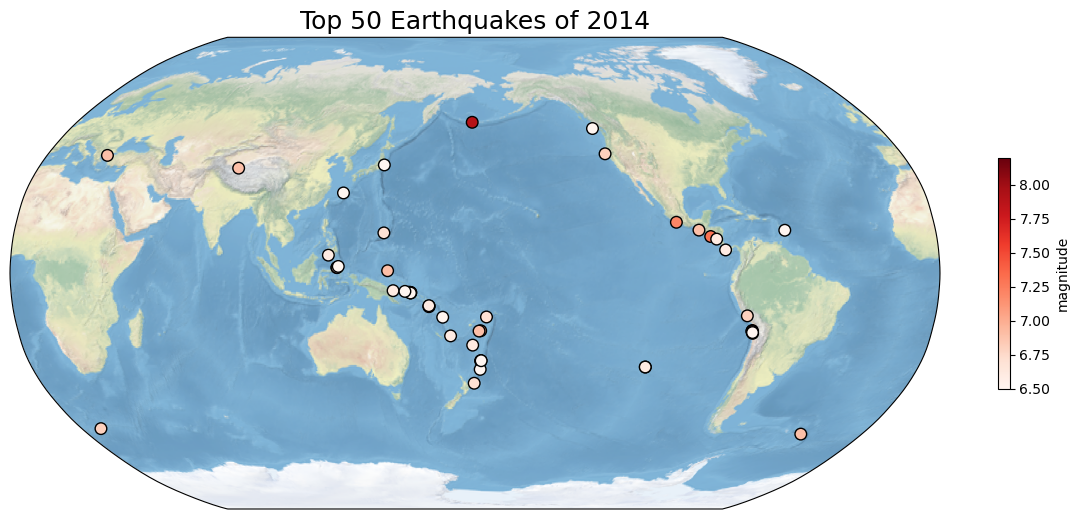

In [4]:
# 降序排列，筛选震级前50的数据
Top_50 = data1.sort_values('mag', ascending=False).head(50)
# 调整画布大小
plt.figure(figsize=(15,10))
# 创建一个Robinson投影，调整中心经度
proj=ccrs.Robinson(central_longitude=180.0)
ax = plt.axes(projection=proj)
# 添加cartopy内置静态图片
ax.stock_img()
# 绘制震级前50的点
plt.scatter('longitude','latitude',data=Top_50,c='mag',s=70,transform=ccrs.PlateCarree(),cmap='Reds',edgecolors='black')
# 添加colorbar和标题
plt.colorbar(label='magnitude', shrink=0.3)
plt.title('Top 50 Earthquakes of 2014', fontsize=18)

# 2. Explore a netCDF dataset
## Browse the NASA’s Goddard Earth Sciences Data and Information Services Center (GES DISC) website. Search and download a dataset you are interested in. You are also welcome to use data from your group in this problem set. But the dataset should be in netCDF format. For this problem set, you are welcome to use the same dataset you used in Assignment 03.


In [5]:
# 2. Explore a netCDF dataset
# 加载所需的数据（数据同PS3_T3）
data= xr.open_dataset(r"D:\ESE5023\GEOSCarb_CASAGFED3v3_Fire.Daily.x720_y360.2015.nc", engine="netcdf4")

## 2.1 [10 points] 
## Make a global map of a certain variable. Your figure should contain: a project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

Text(-125, 45, 'North America')

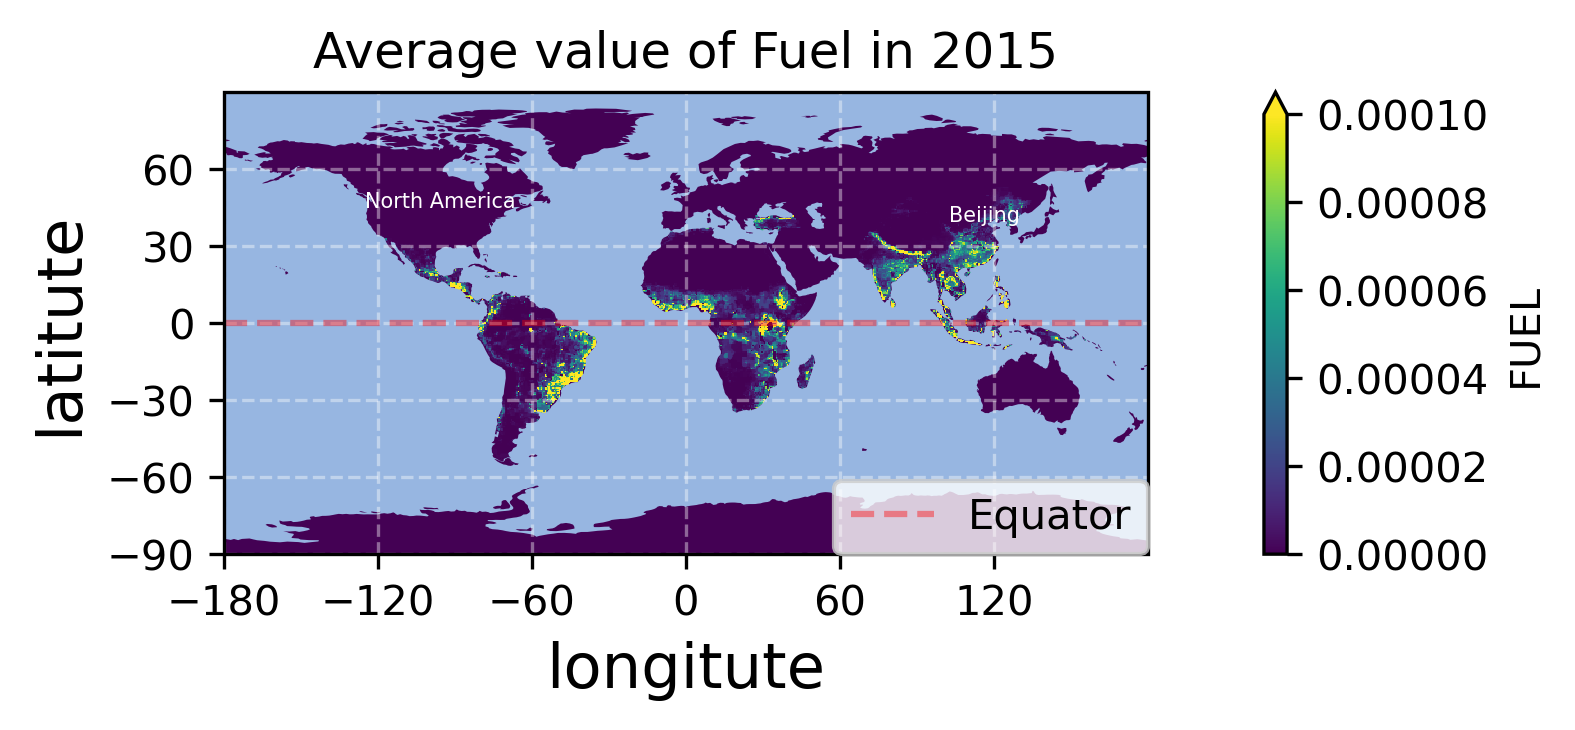

In [14]:
# 2.1
# 绘制2015年Fuel的平均值
FUEL_mean=data.FUEL.mean(dim='time')
#设置绘图大小、colorbar范围
plt.figure(figsize=(10,2), dpi=300)
proj = ccrs.PlateCarree()
ax=plt.axes(projection=proj)
FUEL_mean.plot(ax=ax,vmin=0,vmax=0.0001)
# 添加x、y轴标题
plt.xlabel('longitute', fontsize=15, zorder=10)
plt.ylabel('latitute', fontsize=15, zorder=10)
# 设置x、y轴刻度
x_ticks = np.arange(-180, 180, 60)
y_ticks = np.arange(-90, 90, 30)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
# 添加标题
plt.title('Average value of Fuel in 2015')
# 添加网格线，调整网格线透明度
plt.grid(c='w',linestyle='--',alpha=0.4)
#添加图例“赤道”
plt.axhline(y = 0, ls = '--',color = 'red',alpha = 0.4, label = 'Equator')
plt.legend(bbox_to_anchor=(1, 0), loc=4, borderaxespad=0)
# Mask海洋
ax.add_feature(cfeature.OCEAN, zorder=1)
# 添加annotation
plt.annotate('Beijing',(116.3,39.9), ha="center",color = "w",size = 5)
# 添加text box
plt.text(-125, 45, 'North America',color = "w",size = 5)

## 2.2 [10 points] 
## Make a regional map of the same variable. Your figure should contain: a different project, x label and ticks, y label and ticks, title, gridlines, legend, colorbar, masks or features, annotations, and text box (1 point each).

Text(70, 30, '30°N')

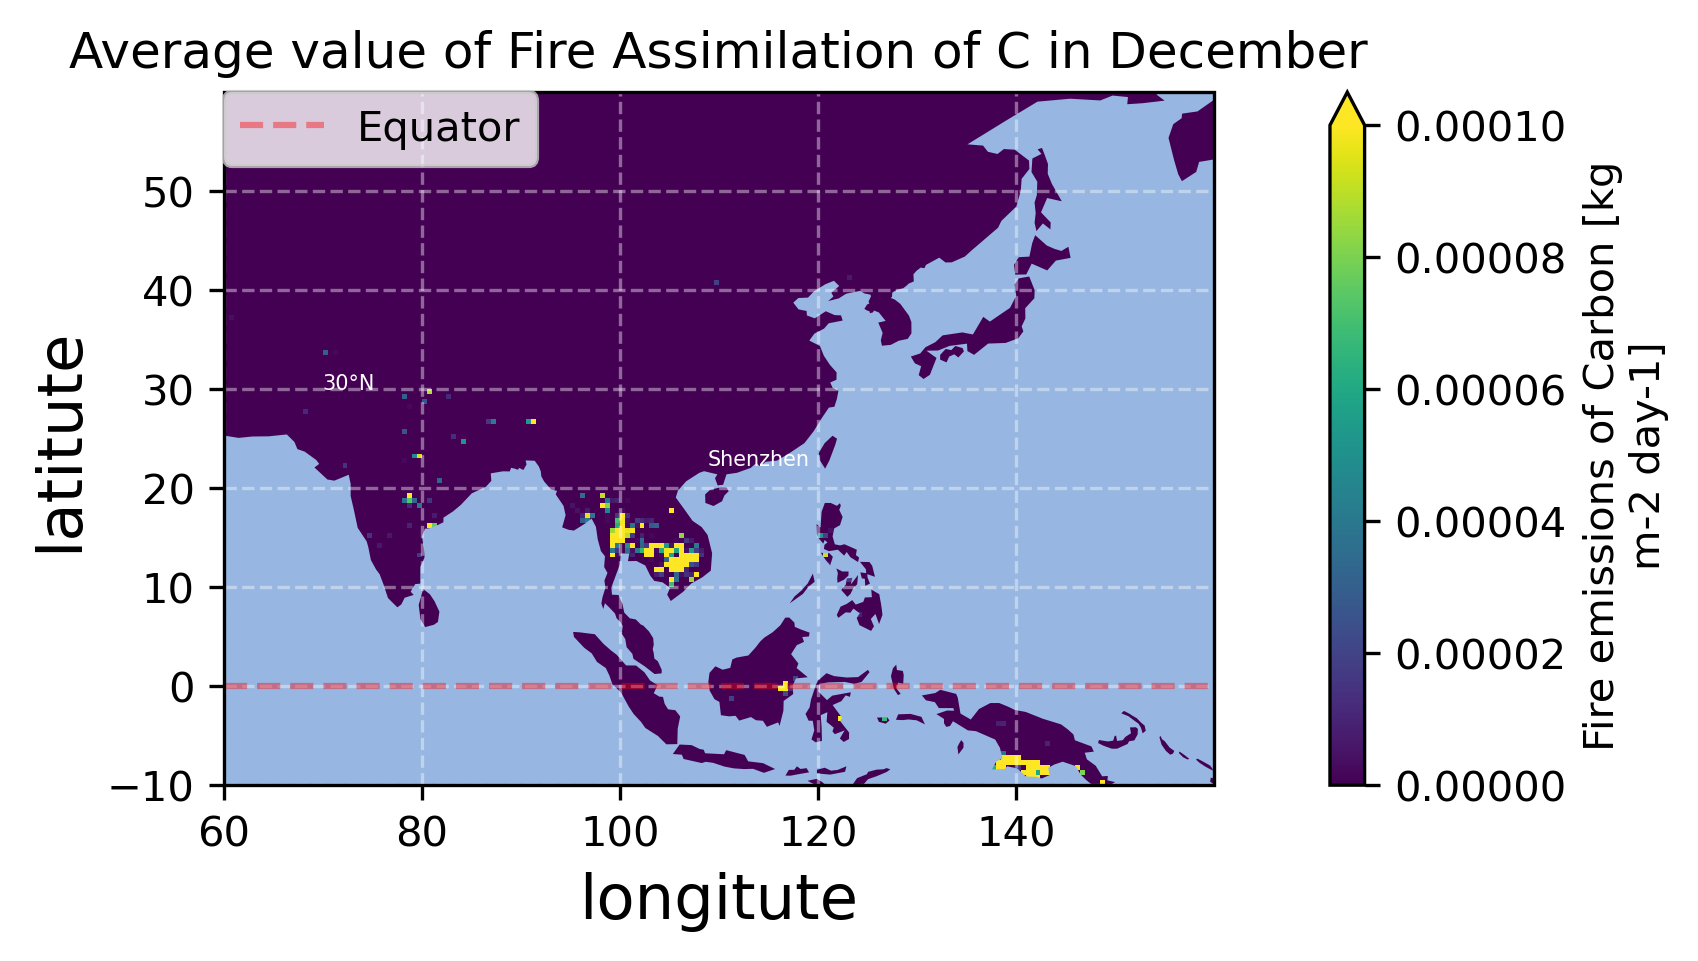

In [11]:
# 2.2
#Fire Assimilation of C在12月的平均值
FIRE_12_mean=data.FIRE.groupby('time.month').mean().sel(month=12)
#设置绘图大小、colorbar范围
plt.figure(figsize=(10,3), dpi=300)
proj = ccrs.PlateCarree()
ax=plt.axes(projection=proj)
FIRE_12_mean.plot(ax=ax,vmin=0,vmax=0.0001)
# 添加x、y轴标题
plt.xlabel('longitute', fontsize=15, zorder=10)
plt.ylabel('latitute', fontsize=15, zorder=10)
#选择范围（中国附近）
plt.xlim(60,160)
plt.ylim(-10,60)
# 设置x、y轴刻度
x_ticks = np.arange(60, 160, 20)
y_ticks = np.arange(-10,60, 10)
plt.xticks(x_ticks)
plt.yticks(y_ticks)
# 添加标题
plt.title('Average value of Fire Assimilation of C in December')
# 添加网格线，调整网格线透明度
plt.grid(c='w',linestyle='--',alpha=0.4)
#添加图例“赤道”
plt.axhline(y = 0, ls = '--',color = 'red',alpha = 0.4, label = 'Equator')
plt.legend(bbox_to_anchor=(0, 1), loc=2, borderaxespad=0)
# Mask海洋
ax.add_feature(cfeature.OCEAN, zorder=1)
# 添加annotation
plt.annotate('Shenzhen',(114,22.3), ha="center",color = "w",size = 5)
# 添加text box
plt.text(70, 30, '30°N',color = "w",size = 5)